<a href="https://colab.research.google.com/github/lingliao/Machine-learning-model/blob/main/LL_sld_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
 readfile <- read.csv("/content/sld_version3.csv")

In [ ]:
head(readfile)

,patient.ID,Status_at_Sample,Baseline,SLD,Time_Point_Response,Relative_cfDNA_Fraction
,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
1,100-561,NED,233,0.00,CR,0.0000
2,100-561,NED,331,0.00,CR,0.0000
3,100-583,NED,389,0.00,CR,0.0000
4,100-593,NED,88,0.00,CR,0.0000
5,100-593,NED,207,0.00,CR,0.0000
6,100-570,metastatis from Recurrent MPNST,0,25.91,NONE,6.4775


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: environment
    rescale: function
    reset: function
    scale_name: brewer
    train: function
    train_df: function
    transform: function
    transform_df: function
    super:  <ggproto object: Class ScaleDiscrete, Scale, gg>

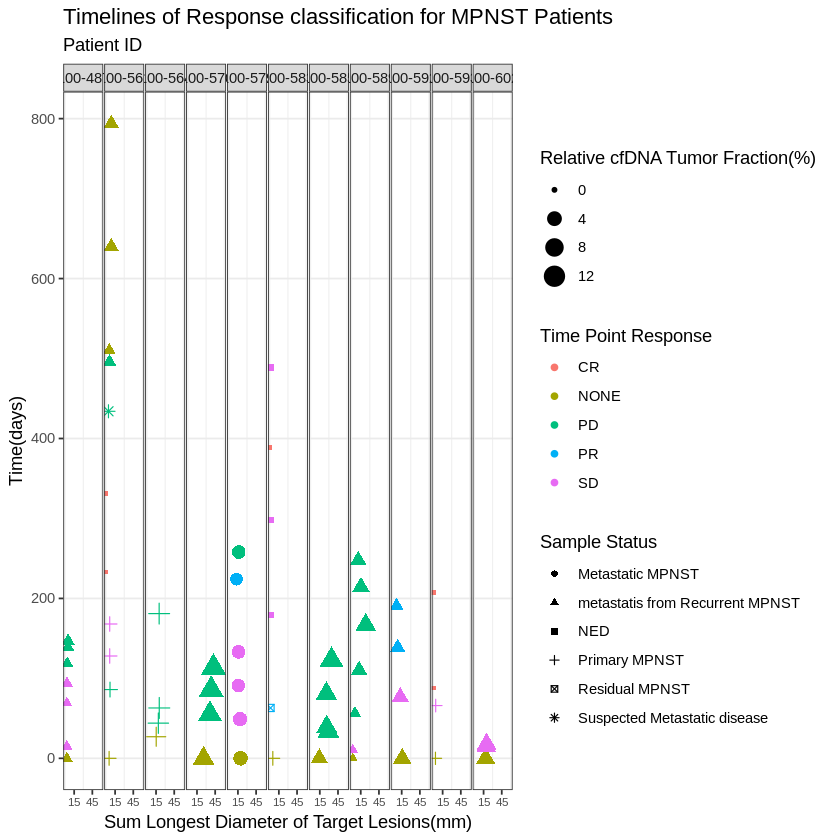

In [ ]:
# calculate means and standard erroes by sex,
# rank and discipline

library(dplyr)
plotdata <- readfile %>%
  group_by(patient.ID)

# create plot
ggplot(plotdata, 
       aes(y =  Baseline, 
           x = SLD,
           color = Time_Point_Response)) +
  geom_point(aes(size = Relative_cfDNA_Fraction, shape =Status_at_Sample)) +

  scale_x_continuous(limits = c(0, 60), breaks = seq(15, 45, by = 30)) +
  facet_grid( . ~ patient.ID,switch = "y",labeller = label_wrap_gen(20)) +
  theme_bw() +
  theme(#panel.spacing.x=unit(0.2, "lines"),
        axis.text.x=element_text(size=7,angle = 0),
        #panel.spacing.x = unit(2, "lines"),
        strip.text.y = element_text(size = 7, angle = 0),
        panel.spacing = unit(0.2, "mm"),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank()) +
  labs(x="Sum Longest Diameter of Target Lesions(mm)", 
       y="Time(days)", 
       title="Timelines of Response classification for MPNST Patients",
       subtitle = "Patient ID") +
  guides(size = guide_legend(title = "Relative cfDNA Tumor Fraction(%)"),
         shape = guide_legend(title = "Sample Status"),
         color = guide_legend(title = "Time Point Response"))
  scale_color_brewer(palette="Set1")



In [ ]:
ggsave(file="sld.pdf", width=9, height=6, dpi=1000)

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
